<a href="https://colab.research.google.com/github/SukanyaPathak2904/Birds_image_detection/blob/main/birds27_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras import Sequential
#from keras.models import sequential
from glob import glob
from keras.layers import Flatten,Dense, Lambda,Input
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications import mobilenet_v2
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from keras.models import Sequential

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab_Notebooks/birds365model/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import os

root_dir = "/content/drive/MyDrive/Colab_Notebooks/birds365model/train_new"
root_dir = os.listdir(root_dir)
root_dir = root_dir[:3]
root_dir

/content/drive/MyDrive/Colab_Notebooks/birds365model/birds365 species.ipynb
/content/drive/MyDrive/Colab_Notebooks/birds365model/birdsmodel_vgg16.h5
/content/drive/MyDrive/Colab_Notebooks/birds365model/weather.ipynb
/content/drive/MyDrive/Colab_Notebooks/birds365model/test_new/IMPERIAL SHAQ/5.jpg
/content/drive/MyDrive/Colab_Notebooks/birds365model/test_new/IMPERIAL SHAQ/1.jpg
/content/drive/MyDrive/Colab_Notebooks/birds365model/test_new/IMPERIAL SHAQ/4.jpg
/content/drive/MyDrive/Colab_Notebooks/birds365model/test_new/IMPERIAL SHAQ/3.jpg
/content/drive/MyDrive/Colab_Notebooks/birds365model/test_new/IMPERIAL SHAQ/2.jpg
/content/drive/MyDrive/Colab_Notebooks/birds365model/test_new/HARPY EAGLE/4.jpg
/content/drive/MyDrive/Colab_Notebooks/birds365model/test_new/HARPY EAGLE/3.jpg
/content/drive/MyDrive/Colab_Notebooks/birds365model/test_new/HARPY EAGLE/5.jpg
/content/drive/MyDrive/Colab_Notebooks/birds365model/test_new/HARPY EAGLE/1.jpg
/content/drive/MyDrive/Colab_Notebooks/birds365model/t

['INDIAN BUSTARD', 'INCA TERN', 'HARPY EAGLE']

In [ ]:
import cv2
X, y = [], []

for directory in root_dir:
    dir_path = os.path.join("/content/drive/MyDrive/Colab_Notebooks/birds365model/train_new", directory)
    if os.path.isdir(dir_path):
        for file_name in os.listdir(dir_path):
            image_path = os.path.join(dir_path, file_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224, 224))
            image = image / 225
            X.append(image)
            y.append(directory)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3)

In [ ]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense

model = Sequential([
    Conv2D(8, (3,3), input_shape=(224, 224, 3), activation="relu"),
    MaxPooling2D((3,3)),

    Conv2D(16, (3,3), activation="relu"),
    MaxPooling2D((3,3)),

    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((3,3)),

   Flatten(),

    Dense(40, activation="relu"),
    Dense(3, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 32)          0

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001), metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
2/2 [==============================] - 6s 2s/step - loss: 0.6538 - accuracy: 0.7899 - val_loss: 0.6971 - val_accuracy: 0.7549
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 0.6358 - accuracy: 0.8109 - val_loss: 0.6793 - val_accuracy: 0.7549
Epoch 3/10
2/2 [==============================] - 3s 2s/step - loss: 0.6183 - accuracy: 0.8235 - val_loss: 0.6609 - val_accuracy: 0.7647
Epoch 4/10
2/2 [==============================] - 4s 3s/step - loss: 0.6025 - accuracy: 0.8277 - val_loss: 0.6426 - val_accuracy: 0.7745
Epoch 5/10
2/2 [==============================] - 3s 2s/step - loss: 0.5856 - accuracy: 0.8403 - val_loss: 0.6305 - val_accuracy: 0.7647
Epoch 6/10
2/2 [==============================] - 3s 2s/step - loss: 0.5691 - accuracy: 0.8445 - val_loss: 0.6184 - val_accuracy: 0.7745
Epoch 7/10
2/2 [==============================] - 3s 2s/step - loss: 0.5529 - accuracy: 0.8487 - val_loss: 0.6053 - val_accuracy: 0.7843
Epoch 8/10
2/2 [=========================

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

3/3 [==============================] - 0s 109ms/step - loss: 0.5761 - accuracy: 0.8118
Test Accuracy: 0.8117647171020508
Test Loss: 0.5760579109191895


In [ ]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 106ms/step


In [ ]:
print("Originally: ", root_dir[np.argmax(y_test[2])])
print("Predicted:" , root_dir[np.argmax(y_pred[2])])

Originally:  INCA TERN
Predicted: INCA TERN


In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.653781,0.789916,0.697132,0.754902
1,0.635764,0.810924,0.679349,0.754902
2,0.618305,0.823529,0.660889,0.764706
3,0.602496,0.827731,0.642621,0.774510
4,0.585574,0.840336,0.630486,0.764706


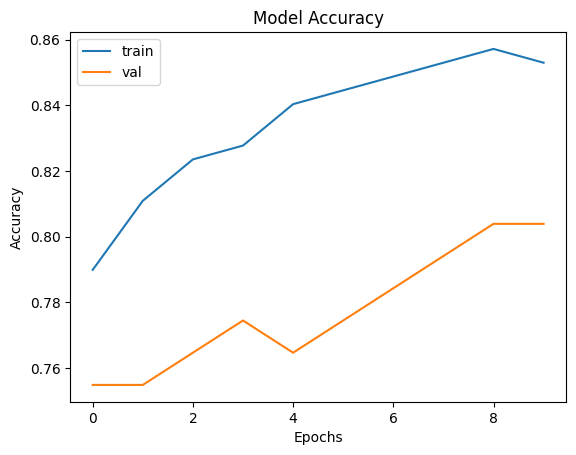

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

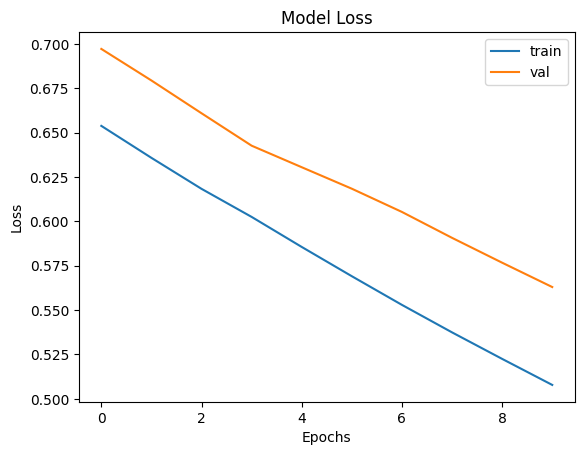

In [ ]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

In [ ]:
len(y_pred)

85

In [ ]:
count = 0
for i in range(1, 85):
    if root_dir[np.argmax(y_test[i])] == root_dir[np.argmax(y_pred[i])]:
        count += 1

print(count/85, "%")

0.8 %
